In [1]:
from src.datasets import NoisySpeechDataset
from src.utils import checkpoint
from src.utils.notebook import Sampler, visualize_audio 

In [2]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [3]:
CHECKPOINT = 'wave-u-net-fl-up-learning-rate-1575794210.full.ckpt'

In [4]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()
sampler = Sampler(net, dataset)

In [5]:
# URL = 'http://hwcdn.libsyn.com/p/6/2/4/624d98a205e61696/Episode6.mp3?c_id=16277365&cs_id=16277365&expiration=1573280793&hwt=d38322eec81b7584389a6b9b6a92159a'
# START = 17 * 2**16
# WIDTH = 2 * 2**16
# noisy_arr, pred_clean, pred_noise = sampler.get_results_from_mp3_url(URL, start=START, width=WIDTH)

IDX = 124
noisy_arr, clean_arr, pred_clean, pred_noise, true_noise = sampler.get_results(IDX)

Predicted clean signal


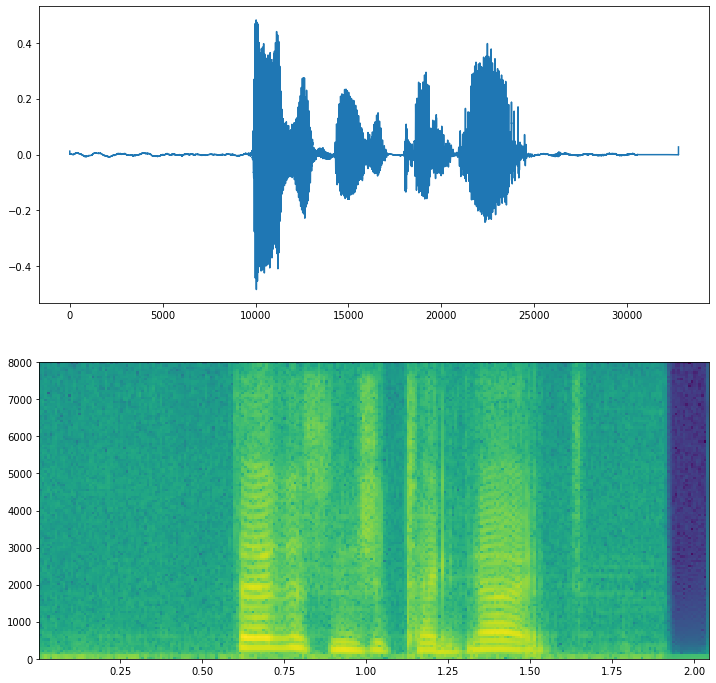

In [6]:
visualize_audio(pred_clean, 'Predicted clean signal')

Clean signal


/home/matt/code/speech/notebooks/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


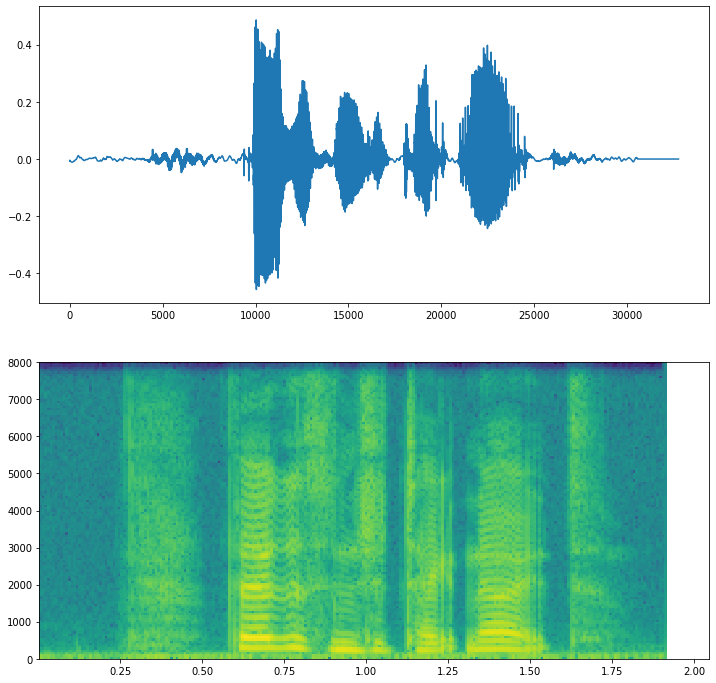

In [7]:
visualize_audio(clean_arr, 'Clean signal')

Noisy signal


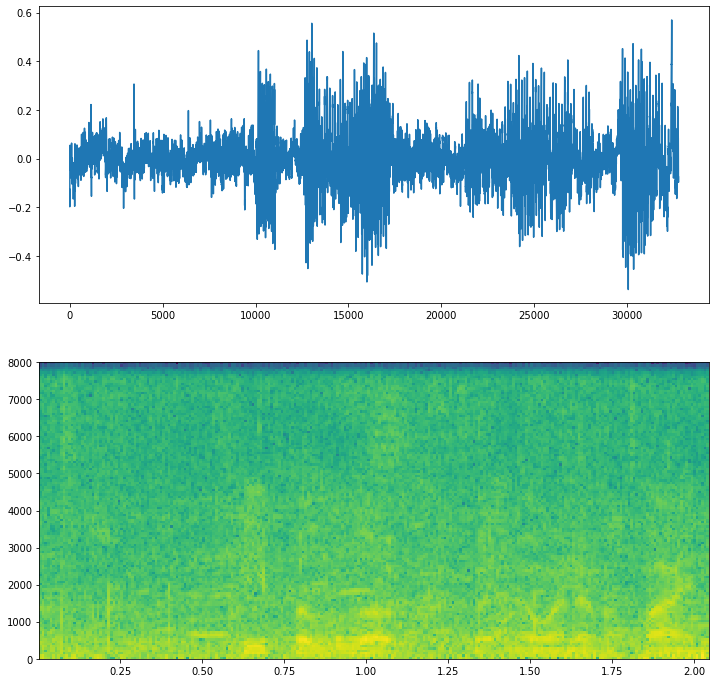

In [9]:
visualize_audio(noisy_arr, 'Noisy signal')

Predicted noise


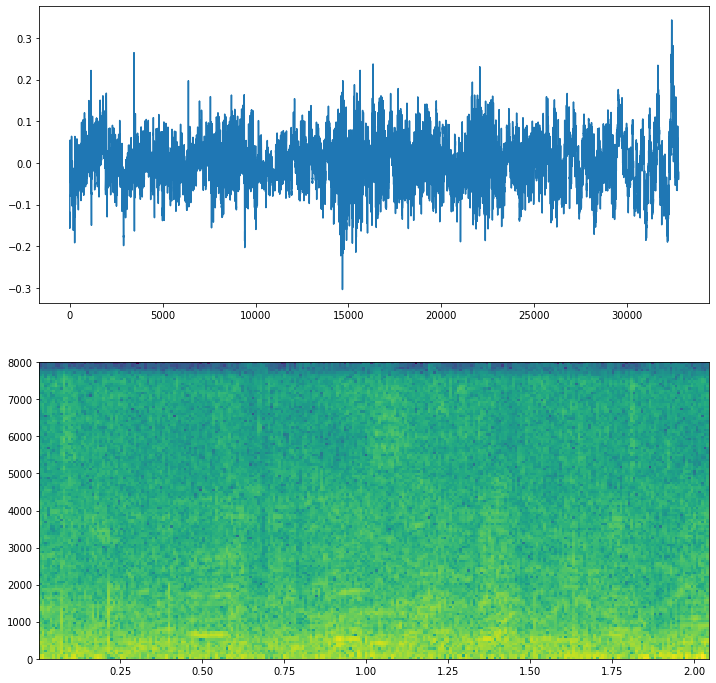

In [10]:
visualize_audio(pred_noise, 'Predicted noise')

True noise signal


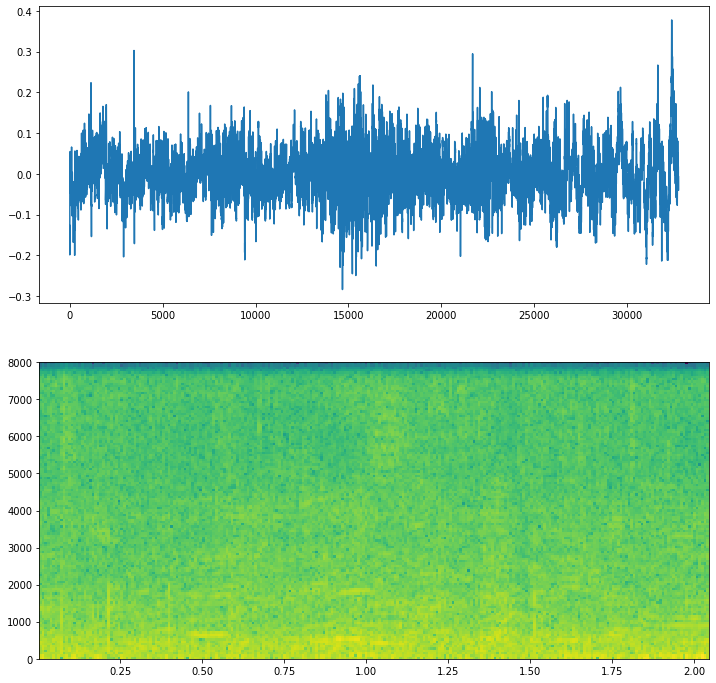

In [11]:
visualize_audio(true_noise, 'True noise signal')